# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [ ]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.datasets import make_blobs, load_wine , fetch_20newsgroups
from sklearn.metrics import plot_confusion_matrix, roc_auc_score, roc_curve

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

## Regression Model Evaluation

In [ ]:
from sklearn.datasets import load_boston

data = load_boston()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=['MEDV'])

data = pd.concat([X, y], axis=1)

-## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [ ]:
model_LR = LinearRegression()
model_LR.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
predict_train = model_LR.predict(X_train)
predict_train[:10]

array([[-0.13337979],
       [-0.07219427],
       [ 1.17602799],
       [ 0.00825707],
       [-0.00972756],
       [ 1.68517486],
       [ 1.28520161],
       [-0.069746  ],
       [-0.07794821],
       [-0.16037231]])

In [ ]:
predict_test = model_LR.predict(X_test)
predict_test[:10]

array([[ 1.23071715],
       [-0.04010441],
       [ 2.21970287],
       [ 1.34966889],
       [ 1.28429336],
       [ 0.02248402],
       [ 1.05726124],
       [ 1.82403704],
       [ 1.36824643],
       [ 1.06766437]])

## 3. Calculate and print R-squared for both the training and the testing set.

In [ ]:
r2_score(y_train,predict_train)

0.9254199044989622

In [ ]:
r2_score(y_test,predict_test)

0.9468960016420045

## 4. Calculate and print mean squared error for both the training and the testing set.

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train,predict_train)

0.04909338369821791

In [ ]:
mean_squared_error(y_test,predict_test)

0.037113794407976866

## 5. Calculate and print mean absolute error for both the training and the testing set.

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_train,predict_train)

0.17139700580706987

In [ ]:
mean_absolute_error(y_test,predict_test)

0.14637694965308523

## Classification Model Evaluation

In [ ]:
from sklearn.datasets import load_iris

data = load_iris()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=["class"])

data = pd.concat([X, y], axis=1)

## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
model.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_train

array([0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 2, 1, 2,
       1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2, 2,
       1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 2, 0, 2, 0, 0, 2, 1, 2, 2, 2, 2, 1,
       0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 2,
       1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2,
       1, 1, 2, 2, 0, 1, 2, 0, 1, 2])

In [ ]:
y_pred_test = model.predict(X_test)
y_pred_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

## 8. Calculate and print the accuracy score for both the training and the testing set.

In [ ]:
metrics.accuracy_score(y_train, y_pred_train)

0.975

In [ ]:
metrics.accuracy_score(y_test, y_pred_test)

1.0

## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [ ]:
metrics.balanced_accuracy_score(y_train, y_pred_train)

0.975609756097561

In [ ]:
metrics.balanced_accuracy_score(y_test,y_pred_test)

1.0

## 10. Calculate and print the precision score for both the training and the testing set.

In [ ]:
from sklearn.metrics import precision_score
metrics.precision_score(y_train, y_pred_train, average='macro')

0.9761904761904763

In [ ]:
metrics.precision_score(y_test, y_pred_test, average='macro')

1.0

## 11. Calculate and print the recall score for both the training and the testing set.

In [ ]:
from sklearn.metrics import recall_score
metrics.recall_score(y_test, y_pred_test, average='macro')

1.0

In [ ]:
metrics.recall_score(y_train, y_pred_train, average='macro')

0.975609756097561

## 12. Calculate and print the F1 score for both the training and the testing set.

In [ ]:
metrics.f1_score(y_test, y_pred_test, average='macro')

1.0

In [ ]:
metrics.f1_score(y_train, y_pred_train, average='macro')

0.9749960931395533

## 13. Generate confusion matrices for both the training and the testing set.

In [ ]:
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

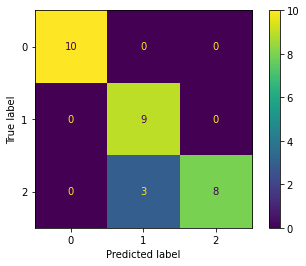

In [ ]:
plot_confusion_matrix(classifier, X_test, y_test)

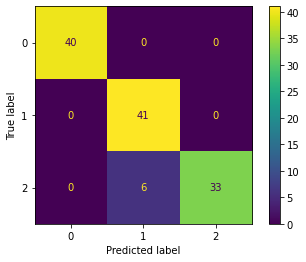

In [ ]:
plot_confusion_matrix(classifier, X_train, y_train)

## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.